In [9]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("lainguyn123/student-performance-factors")

print("Path to dataset files:", path)

100%|██████████████████████████████████████████████████████████████████████████████| 93.9k/93.9k [00:00<00:00, 493kB/s]

Extracting files...
Path to dataset files: C:\Users\Sharj\.cache\kagglehub\datasets\lainguyn123\student-performance-factors\versions\8


In [10]:
import os

# Kijk wat er in de map staat
for root, dirs, files in os.walk(path):
    for file in files:
        print(os.path.join(root, file))

C:\Users\Sharj\.cache\kagglehub\datasets\lainguyn123\student-performance-factors\versions\8\StudentPerformanceFactors.csv


In [22]:
import pandas as pd

# Vervang dit pad door het juiste bestandspad bij jou
df = pd.read_csv(r"C:\Users\Sharj\.cache\kagglehub\datasets\lainguyn123\student-performance-factors\versions\8\StudentPerformanceFactors.csv")

print(df.head(n=5))

   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \
0             Ye

In [23]:
print(df.shape)

(6607, 20)


In [28]:
# Aantal unieke waarden
num_unique_values = df['Internet_Access'].nunique()
print(f"Aantal mogelijke waarden: {num_unique_values}")

# Beschrijving van mogelijke waarden
unique_values = df['Internet_Access'].unique()
print(f"Mogelijke waarden: {list(unique_values)}")

# Modus (meest voorkomende waarde)
mode_value = df['Internet_Access'].mode()[0]
print(f"\nModus (meest voorkomende waarde): {mode_value}")

# Frequentie, proportie en percentage van elke categorie
value_counts = df['Internet_Access'].value_counts()
proportions = df['Internet_Access'].value_counts(normalize=True)
percentages = proportions * 100

print("\nFrequentie, proportie en percentage per categorie:")
for category in value_counts.index:
    count = value_counts[category]
    prop = proportions[category]
    percent = percentages[category]
    print(f"{category}: {count} gevallen (proportie: {prop:.4f}, {percent:.2f}%)")

# Totale aantal gevallen ter controle
total_cases = len(df['Internet_Access'])
print(f"\nTotaal aantal gevallen: {total_cases}")

Aantal mogelijke waarden: 2
Mogelijke waarden: ['Yes', 'No']

Modus (meest voorkomende waarde): Yes

Frequentie, proportie en percentage per categorie:
Yes: 6108 gevallen (proportie: 0.9245, 92.45%)
No: 499 gevallen (proportie: 0.0755, 7.55%)

Totaal aantal gevallen: 6607


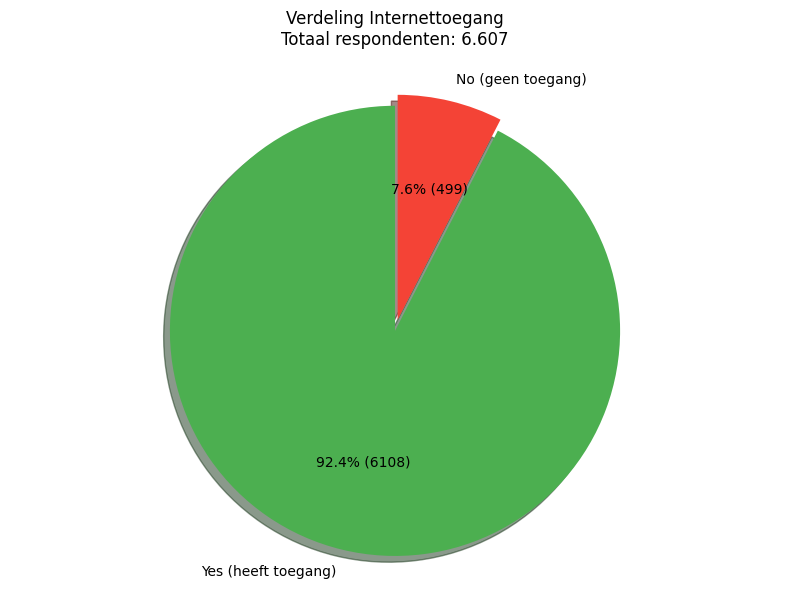

In [31]:
import matplotlib.pyplot as plt

# Data
labels = ['Yes (heeft toegang)', 'No (geen toegang)']
sizes = [6108, 499]  # Aantallen
colors = ['#4CAF50', '#F44336']  # Groen en rood
explode = (0.05, 0)  # Benadruk het 'Yes' segment
percentages = [92.45, 7.55]  # Percentages

# Plot
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct=lambda p: f'{p:.1f}% ({int(round(p*sum(sizes)/100))})', 
        shadow=True, startangle=90)
plt.title('Verdeling Internettoegang\nTotaal respondenten: 6.607', pad=20)
plt.axis('equal')  # Zorgt voor een ronde taart

plt.tight_layout()
plt.show()

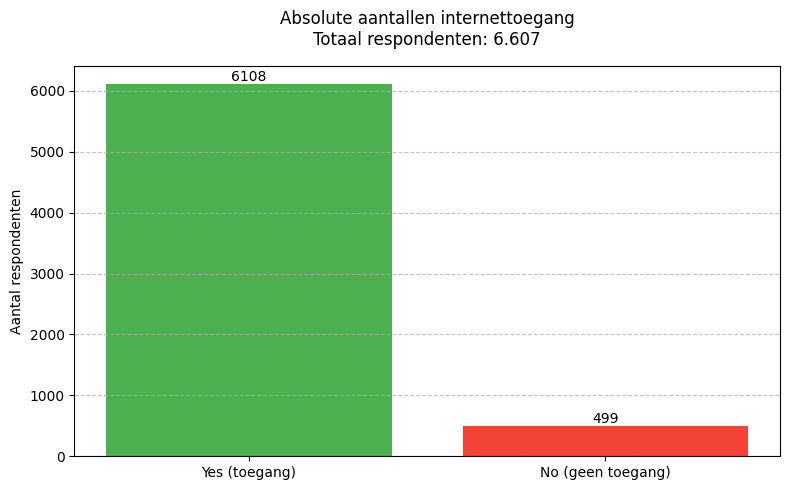

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Data
categories = ['Yes (toegang)', 'No (geen toegang)']
counts = [6108, 499]
colors = ['#4CAF50', '#F44336']  # Groen en rood

# Plot
plt.figure(figsize=(8, 5))
bars = plt.bar(categories, counts, color=colors)

# Aantallen boven de staven
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height}',
             ha='center', va='bottom')

plt.title('Absolute aantallen internettoegang\nTotaal respondenten: 6.607', pad=15)
plt.ylabel('Aantal respondenten')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

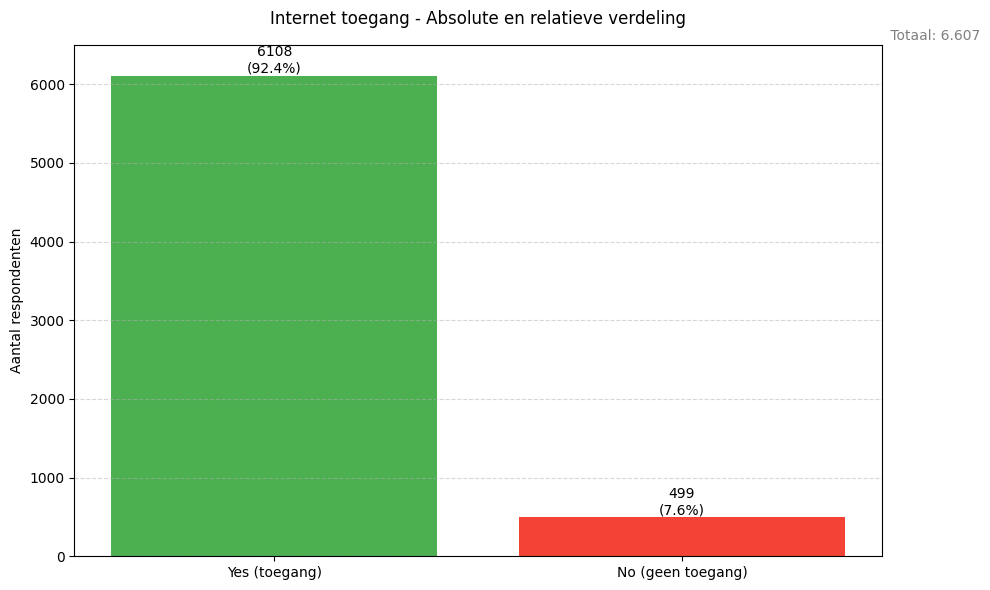

In [33]:
plt.figure(figsize=(10, 6))
bars = plt.bar(categories, counts, color=colors)

# Dual annotation
for bar in bars:
    height = bar.get_height()
    percentage = (height / 6607) * 100
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height}\n({percentage:.1f}%)',
             ha='center', va='bottom',
             linespacing=1.2)

plt.title('Internet toegang - Absolute en relatieve verdeling', pad=15)
plt.ylabel('Aantal respondenten')
plt.ylim(0, 6500)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Referentielijn voor totaal
plt.axhline(y=6607, color='gray', linestyle=':', alpha=0.5)
plt.text(1.5, 6607, ' Totaal: 6.607', va='center', ha='left', color='gray')

plt.tight_layout()
plt.show()

In [34]:
import pandas as pd

# Vervang dit pad door het juiste bestandspad bij jou
df = pd.read_csv(r"C:\Users\Sharj\OneDrive\Bureaublad\ResearchInformation3.csv")

print(df.head(n=5))

                Department  Gender   HSC   SSC                        Income  \
0  Business Administration    Male  4.17  4.84            Low (Below 15,000)   
1  Business Administration  Female  4.92  5.00  Upper middle (30,000-50,000)   
2  Business Administration    Male  5.00  4.83  Lower middle (15,000-30,000)   
3  Business Administration    Male  4.00  4.50           High (Above 50,000)   
4  Business Administration  Female  2.19  3.17  Lower middle (15,000-30,000)   

  Hometown  Computer        Preparation             Gaming Attendance Job  \
0  Village         3  More than 3 Hours           0-1 Hour   80%-100%  No   
1     City         3           0-1 Hour           0-1 Hour   80%-100%  No   
2  Village         3           0-1 Hour  More than 3 Hours   80%-100%  No   
3     City         5  More than 3 Hours  More than 3 Hours   80%-100%  No   
4  Village         3           0-1 Hour          2-3 Hours   80%-100%  No   

   English Extra Semester   Last  Overall  
0        3  

In [35]:
# Mapping van categorische waarden naar numerieke waarden
gaming_map = {"0-1 Hour": 0, "2-3 Hours": 1, "More than 3 Hours": 2}
attendance_map = {
    "Below 40%": 0,
    "40%-59%": 1,
    "60%-79%": 2,
    "80%-100%": 3
}
preparation_map = {
    "0-1 Hour": 0,
    "2-3 Hours": 1,
    "More than 3 Hours": 2
}

# Kolommen omzetten
df["Gaming_num"] = df["Gaming"].map(gaming_map)
df["Attendance_num"] = df["Attendance"].map(attendance_map)
df["Preparation_num"] = df["Preparation"].map(preparation_map)

# Functie om statistieken te tonen
def analyze_ordinal(column_name):
    series = df[column_name].dropna()
    freq = series.value_counts().sort_index()
    rel_freq = freq / freq.sum()
    percent = rel_freq * 100
    mode = series.mode()[0]
    median = series.median()

    print(f"\n=== Statistieken voor: {column_name} ===")
    print("Frequentie:\n", freq)
    print("Relatieve frequentie (proportie):\n", rel_freq.round(2))
    print("Percentage:\n", percent.round(2))
    print("Modus:", mode)
    print("Mediaan:", median)

# Analyse uitvoeren
analyze_ordinal("Gaming_num")
analyze_ordinal("Attendance_num")
analyze_ordinal("Preparation_num")


=== Statistieken voor: Gaming_num ===
Frequentie:
 Gaming_num
0     50
1    141
2    302
Name: count, dtype: int64
Relatieve frequentie (proportie):
 Gaming_num
0    0.10
1    0.29
2    0.61
Name: count, dtype: float64
Percentage:
 Gaming_num
0    10.14
1    28.60
2    61.26
Name: count, dtype: float64
Modus: 2
Mediaan: 2.0

=== Statistieken voor: Attendance_num ===
Frequentie:
 Attendance_num
0     11
1     68
2    217
3    197
Name: count, dtype: int64
Relatieve frequentie (proportie):
 Attendance_num
0    0.02
1    0.14
2    0.44
3    0.40
Name: count, dtype: float64
Percentage:
 Attendance_num
0     2.23
1    13.79
2    44.02
3    39.96
Name: count, dtype: float64
Modus: 2
Mediaan: 2.0

=== Statistieken voor: Preparation_num ===
Frequentie:
 Preparation_num
0    218
1    228
2     47
Name: count, dtype: int64
Relatieve frequentie (proportie):
 Preparation_num
0    0.44
1    0.46
2    0.10
Name: count, dtype: float64
Percentage:
 Preparation_num
0    44.22
1    46.25
2     9.53
Nam

In [17]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("deadier/play-games-and-success-in-students")

print("Path to dataset files:", path)

100%|█████████████████████████████████████████████████████████████████████████████| 4.15k/4.15k [00:00<00:00, 2.79MB/s]

Extracting files...
Path to dataset files: C:\Users\Sharj\.cache\kagglehub\datasets\deadier\play-games-and-success-in-students\versions\2


In [18]:
import os

# Kijk wat er in de map staat
for root, dirs, files in os.walk(path):
    for file in files:
        print(os.path.join(root, file))

C:\Users\Sharj\.cache\kagglehub\datasets\deadier\play-games-and-success-in-students\versions\2\gameandgrade.csv


In [19]:
import pandas as pd

# Vervang dit pad door het juiste bestandspad bij jou
df123 = pd.read_csv(r"C:\Users\Sharj\.cache\kagglehub\datasets\deadier\play-games-and-success-in-students\versions\2\gameandgrade.csv")

print(df.head(n=5))

   Sex  School Code  Playing Years  Playing Often  Playing Hours  \
0    0            1              1              2              1   
1    1            1              1              3              1   
2    0            1              0              0              0   
3    0            1              3              5              1   
4    1            1              1              1              2   

   Playing Games  Parent Revenue  Father Education  Mother Education  Grade  
0              1               4                 4                 5  77.50  
1              1               1                 3                 3  83.00  
2              0               1                 3                 3  80.00  
3              1               2                 2                 3  45.00  
4              1               1                 3                 4  85.00  
